<a href="https://colab.research.google.com/github/FarahSeif/FarahSeif/blob/main/Farah_Seif_smoking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Maternal Smoking

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_table("https://raw.githubusercontent.com/ahmedmoustafa/AUC-Fundamentals-of-Data-Science-II-Spring-2023/main/examples/maternal-smoking/smoking.tsv")
df.shape

(610, 20)

In [3]:
df.head()

,id,date,gestation,weight,parity,mom.race,mom.age,mom.edu,mom.height,mom.weight,dad.race,dad.age,dad.edu,dad.height,dad.weight,marital,income,smoke,quit.time,cigs
0,15,1411,284,120,1,asian,27,5,62,100,asian,31,5,65,110,1,1,never,0,0
1,20,1499,282,113,2,white,33,5,64,135,white,38,5,70,148,1,4,never,0,0
2,100,1673,286,136,4,white,25,2,62,93,white,28,2,64,130,1,4,until_pregnancy,2,2
3,129,1562,245,132,2,black,23,1,65,140,black,23,4,71,192,1,2,never,0,0
4,142,1408,289,120,3,white,25,4,62,125,white,26,1,70,180,0,2,never,0,0


## Q1. Does the mom's smoking pattern affect the newborn birth weight?

In [4]:
df.groupby(['smoke']).agg(average_weight=("weight","median"))

,average_weight
smoke,
never,123.0
now,114.5
once_not_now,123.5
until_pregnancy,124.5


<Axes: xlabel='smoke', ylabel='weight'>

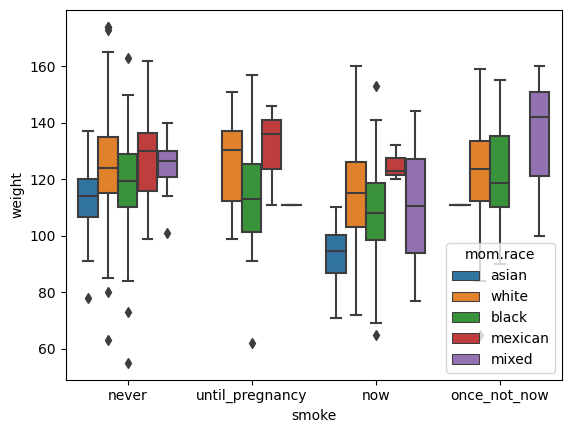

In [5]:
sns.boxplot(data=df,x='smoke',y='weight',hue='mom.race')

Mothers who smoke now have babies that weigh smallest compare to never smoked, until pregnancy and once not now.

## Q2. Does the mom’s race affect the newborn birth weight?


<Axes: xlabel='mom.race', ylabel='weight'>

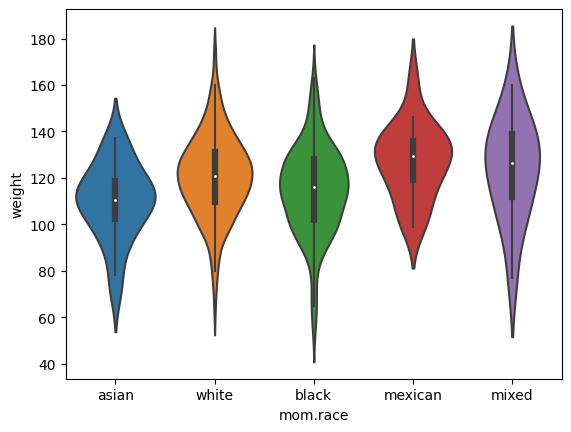

In [6]:
sns.violinplot(x='mom.race',y='weight',data=df)

On average, baby's weight is similar across all races but asian babies weight the smalles compqared to mexican and mixed babies.

## Q3. Is there a correlation between the mom’s weight and the baby’s weight?


/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


<Axes: xlabel='mom.weight', ylabel='weight'>

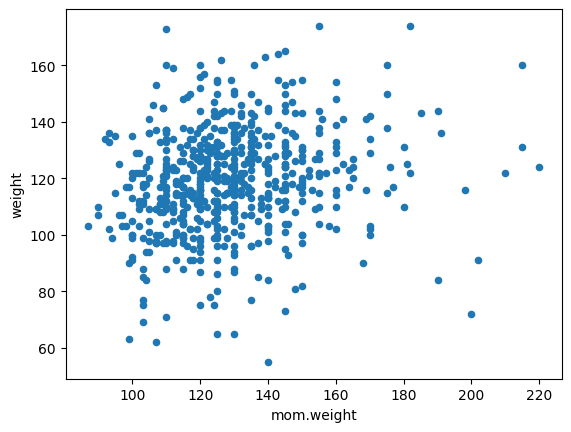

In [7]:
df.plot.scatter(x='mom.weight',y='weight') # correlation is weak

<Axes: xlabel='mom.weight', ylabel='weight'>

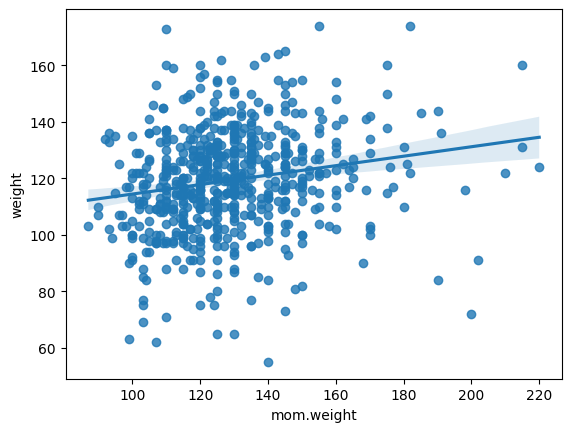

In [8]:
sns.regplot(data=df,x='mom.weight',y='weight')

Correlation between mom's weight and baby's weight is weak.

## Q4. Is there a correlation between the dad’s weight and the baby’s weight?

<Axes: xlabel='dad.weight', ylabel='weight'>

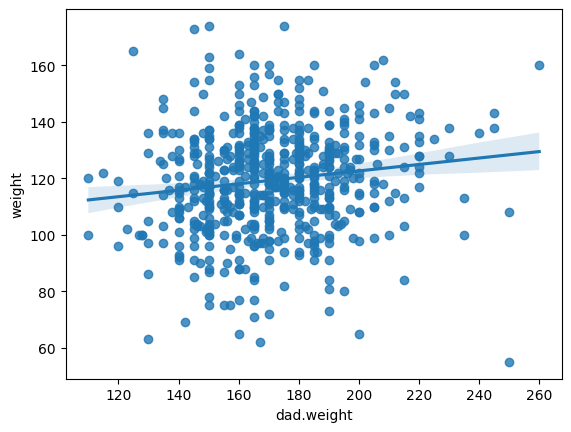

In [9]:
sns.regplot(data=df,x='dad.weight',y='weight')

There is little correlation between dad's weight and baby's weight. It is weak.

## Q5. From Q3 and Q4, which is a stronger correlation?

Mom's weight is a little bit more strongly correlated to the baby's weight. 

## Q6. Is there a correlation between the mom’s weight and the dad’s weight?

<Axes: xlabel='dad.weight', ylabel='mom.weight'>

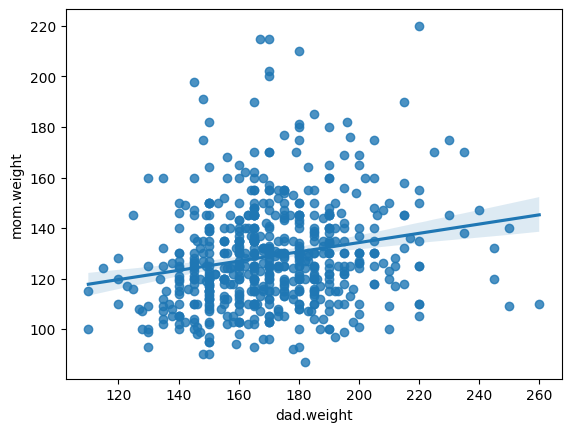

In [10]:
sns.regplot(data=df,x='dad.weight',y='mom.weight') 

There is a slight correlation between mom's weight and dad's weight. It is weak.

## Q7. On average, does the mom’s weight change across the races?

<Axes: xlabel='mom.race', ylabel='mom.weight'>

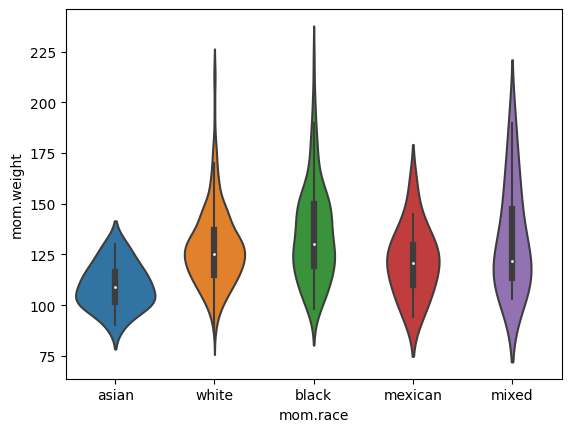

In [11]:
sns.violinplot(x='mom.race',y='mom.weight',data=df) 

On average, there is a weight change across the races with black mom race having the highest weight on average and asian moms weighing the least.

## Q8. Does mom’s smoking pattern change with the mom’s education?

In [12]:
counts=df.groupby(['mom.edu','smoke']).size().to_frame('size').reset_index()
counts

,mom.edu,smoke,size
0,0,never,1
1,0,once_not_now,1
2,0,until_pregnancy,1
3,1,never,26
4,1,now,46
5,1,once_not_now,6
6,1,until_pregnancy,7
7,2,never,103
8,2,now,90
9,2,once_not_now,14


<Axes: xlabel='mom.edu', ylabel='size'>

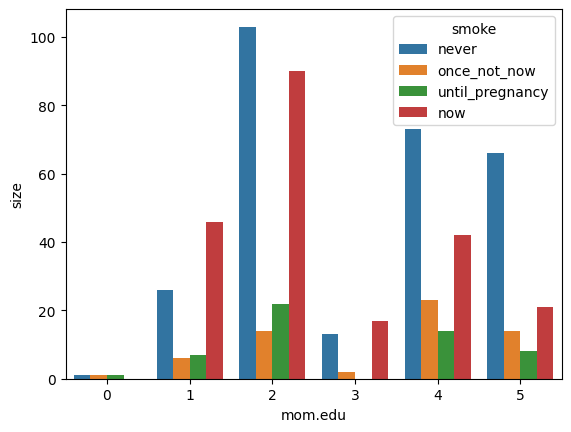

In [13]:
sns.barplot(data=counts,x='mom.edu',y='size',hue='smoke')

The majority of moms who never smoked had their education 2. 

## Q9. Does mom’s smoking pattern change with the family income?

In [14]:
counts=df.groupby(['income','smoke']).size().to_frame('size').reset_index()
counts

,income,smoke,size
0,0,never,6
1,0,now,4
2,0,until_pregnancy,2
3,1,never,44
4,1,now,41
5,1,once_not_now,5
6,1,until_pregnancy,10
7,2,never,48
8,2,now,37
9,2,once_not_now,6


<Axes: xlabel='income', ylabel='size'>

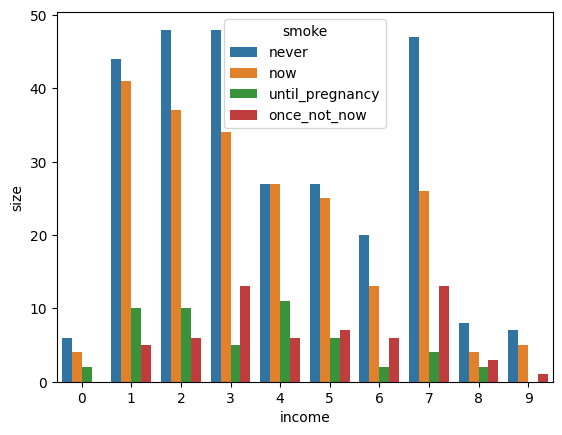

In [15]:
sns.barplot(data=counts,x='income',y='size',hue='smoke')

The smoking pattern is very random with income. However,it is noticed that as income increases, fewer people smoke now.

## Q10. Is there a relationship between the mom’s race and the dad’s race?

In [16]:
counts=df.groupby(['mom.race','dad.race']).size().to_frame('size').reset_index()
counts

,mom.race,dad.race,size
0,asian,asian,22
1,asian,white,2
2,black,black,126
3,black,mixed,5
4,mexican,mexican,15
5,mexican,white,3
6,mixed,black,3
7,mixed,mexican,1
8,mixed,mixed,6
9,mixed,white,4


<Axes: xlabel='mom.race', ylabel='dad.race'>

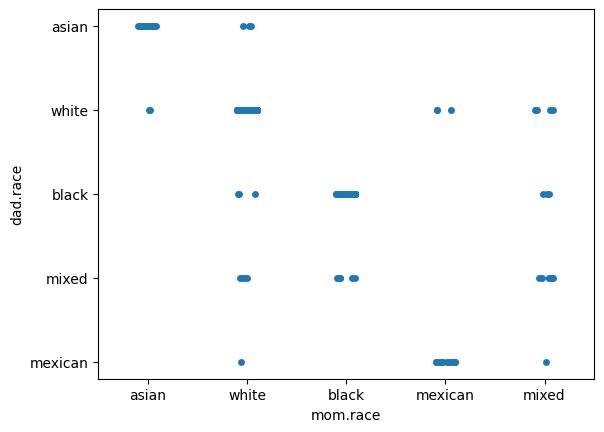

In [21]:
sns.stripplot(data=df,x='mom.race',y='dad.race')